#Importing and visualization

In [ ]:
# Download data from url
!wget https://hello.iitk.ac.in/sites/default/files/ime692a/assignments/problems/1602734114_course%20project_0.zip

--2020-11-09 13:28:35--  https://hello.iitk.ac.in/sites/default/files/ime692a/assignments/problems/1602734114_course%20project_0.zip
Resolving hello.iitk.ac.in (hello.iitk.ac.in)... 15.207.57.185
Connecting to hello.iitk.ac.in (hello.iitk.ac.in)|15.207.57.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 271657 (265K) [application/zip]
Saving to: ‘1602734114_course project_0.zip.1’

1602734114_course p 100%[===================>] 265.29K   637KB/s    in 0.4s    

2020-11-09 13:28:36 (637 KB/s) - ‘1602734114_course project_0.zip.1’ saved [271657/271657]



In [ ]:
!unzip "1602734114_course project_0.zip"

Archive:  1602734114_course project_0.zip
replace course project ime692.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Read data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
# Show first few rows of data
train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,0.832164,0.734772,0.626653,0.238078,0.338718,0.364629,0.533504,0.484752,0.673383,0.394322,0.726064,0.813944,0.686857,0.442066,0.208592,0.846246,0.416390,0.681197,0.415797,0.351630,1
1,0.434020,0.054741,0.316852,0.229558,0.714776,0.185191,0.288082,0.040074,0.588396,0.671829,0.780675,0.862059,0.590721,0.084614,0.890323,0.501312,0.084612,0.751885,0.696986,0.664690,1
2,0.167477,0.627895,0.379868,0.834608,0.286843,0.146932,0.745286,0.063496,0.872345,0.137706,0.174549,0.238914,0.606350,0.906995,0.722755,0.957155,0.772042,0.942410,0.250488,0.401736,0
3,0.917487,0.349867,0.026223,0.904135,0.189632,0.068428,0.424099,0.097569,0.669446,0.264504,0.720960,0.998434,0.676528,0.436011,0.510557,0.254132,0.638738,0.262307,0.917623,0.252353,0
4,0.262515,0.128063,0.684576,0.452624,0.384034,0.032154,0.912727,0.058140,0.946419,0.172531,0.924590,0.852647,0.534161,0.569734,0.293528,0.380042,0.304119,0.465901,0.748553,0.740586,1


We can see that out data is between 0 and 1. So need to apply feature scaling. Also it is a binary classification problem.

In [ ]:
train.shape

(200, 21)

The data has 20 features and 200 data points

Finding features which have correlation greater than 0.1 with each other.

In [ ]:
s = 'x20' # put any name, like x1, x2, x3 etc
w = train.corr()[s][train.corr()[s] > 0.1]
w

x4     0.112602
x20    1.000000
Name: x20, dtype: float64

See the correlation matrix of the data

In [ ]:
train.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
x1,1.000000,-0.010652,-0.103754,-0.054004,-0.072348,0.050160,-0.149607,-0.010295,0.053276,0.094637,-0.072585,0.092509,0.097982,0.066769,-0.023846,0.017885,-0.097594,0.108611,0.188635,-0.057504,0.270116
x2,-0.010652,1.000000,0.046641,0.035117,-0.062454,0.032988,-0.028943,0.011517,0.087967,0.079555,-0.090139,-0.025110,-0.071978,-0.115464,0.029772,0.072559,0.089673,-0.096575,-0.111361,-0.034919,0.370205
x3,-0.103754,0.046641,1.000000,0.042290,-0.032736,0.127636,0.060770,-0.008447,0.012194,0.019313,0.017507,-0.086989,-0.073982,-0.063723,0.065738,0.004751,0.080369,-0.035456,-0.047685,-0.001036,0.309064
x4,-0.054004,0.035117,0.042290,1.000000,-0.169045,-0.041156,-0.050719,-0.033488,0.084460,-0.030989,0.074042,-0.011418,0.012229,-0.000081,0.147983,0.053262,-0.015548,-0.133994,-0.049961,0.112602,0.229545
x5,-0.072348,-0.062454,-0.032736,-0.169045,1.000000,0.113288,0.034817,0.075914,-0.082800,-0.022381,-0.043570,-0.012558,0.086386,-0.061265,-0.029495,0.048092,0.051067,-0.010784,0.066424,0.031908,0.264926
x6,0.050160,0.032988,0.127636,-0.041156,0.113288,1.000000,-0.047492,0.234019,0.062820,-0.069999,0.005530,-0.000674,-0.051553,-0.039090,-0.087831,0.069601,0.024743,0.020982,0.038627,0.093876,0.112589
x7,-0.149607,-0.028943,0.060770,-0.050719,0.034817,-0.047492,1.000000,-0.140463,-0.008938,-0.017539,-0.055246,-0.011331,-0.045957,-0.017774,-0.089232,-0.037756,-0.098955,-0.002193,-0.058728,0.042671,0.006530
x8,-0.010295,0.011517,-0.008447,-0.033488,0.075914,0.234019,-0.140463,1.000000,-0.057852,-0.028396,-0.008854,0.038948,-0.100772,-0.072072,-0.055220,0.056062,0.073389,0.021710,-0.038658,0.024099,0.024069
x9,0.053276,0.087967,0.012194,0.084460,-0.082800,0.062820,-0.008938,-0.057852,1.000000,0.080044,0.021900,0.005014,0.176452,-0.088136,-0.014831,0.077481,0.081328,-0.064716,-0.028741,-0.133919,0.084416
x10,0.094637,0.079555,0.019313,-0.030989,-0.022381,-0.069999,-0.017539,-0.028396,0.080044,1.000000,0.028701,0.022515,0.055369,-0.158605,0.004840,-0.010929,0.075535,0.010602,-0.037840,-0.065273,0.021720


Pairplot of first 10 features. It can be observed that features are not correlated with each other

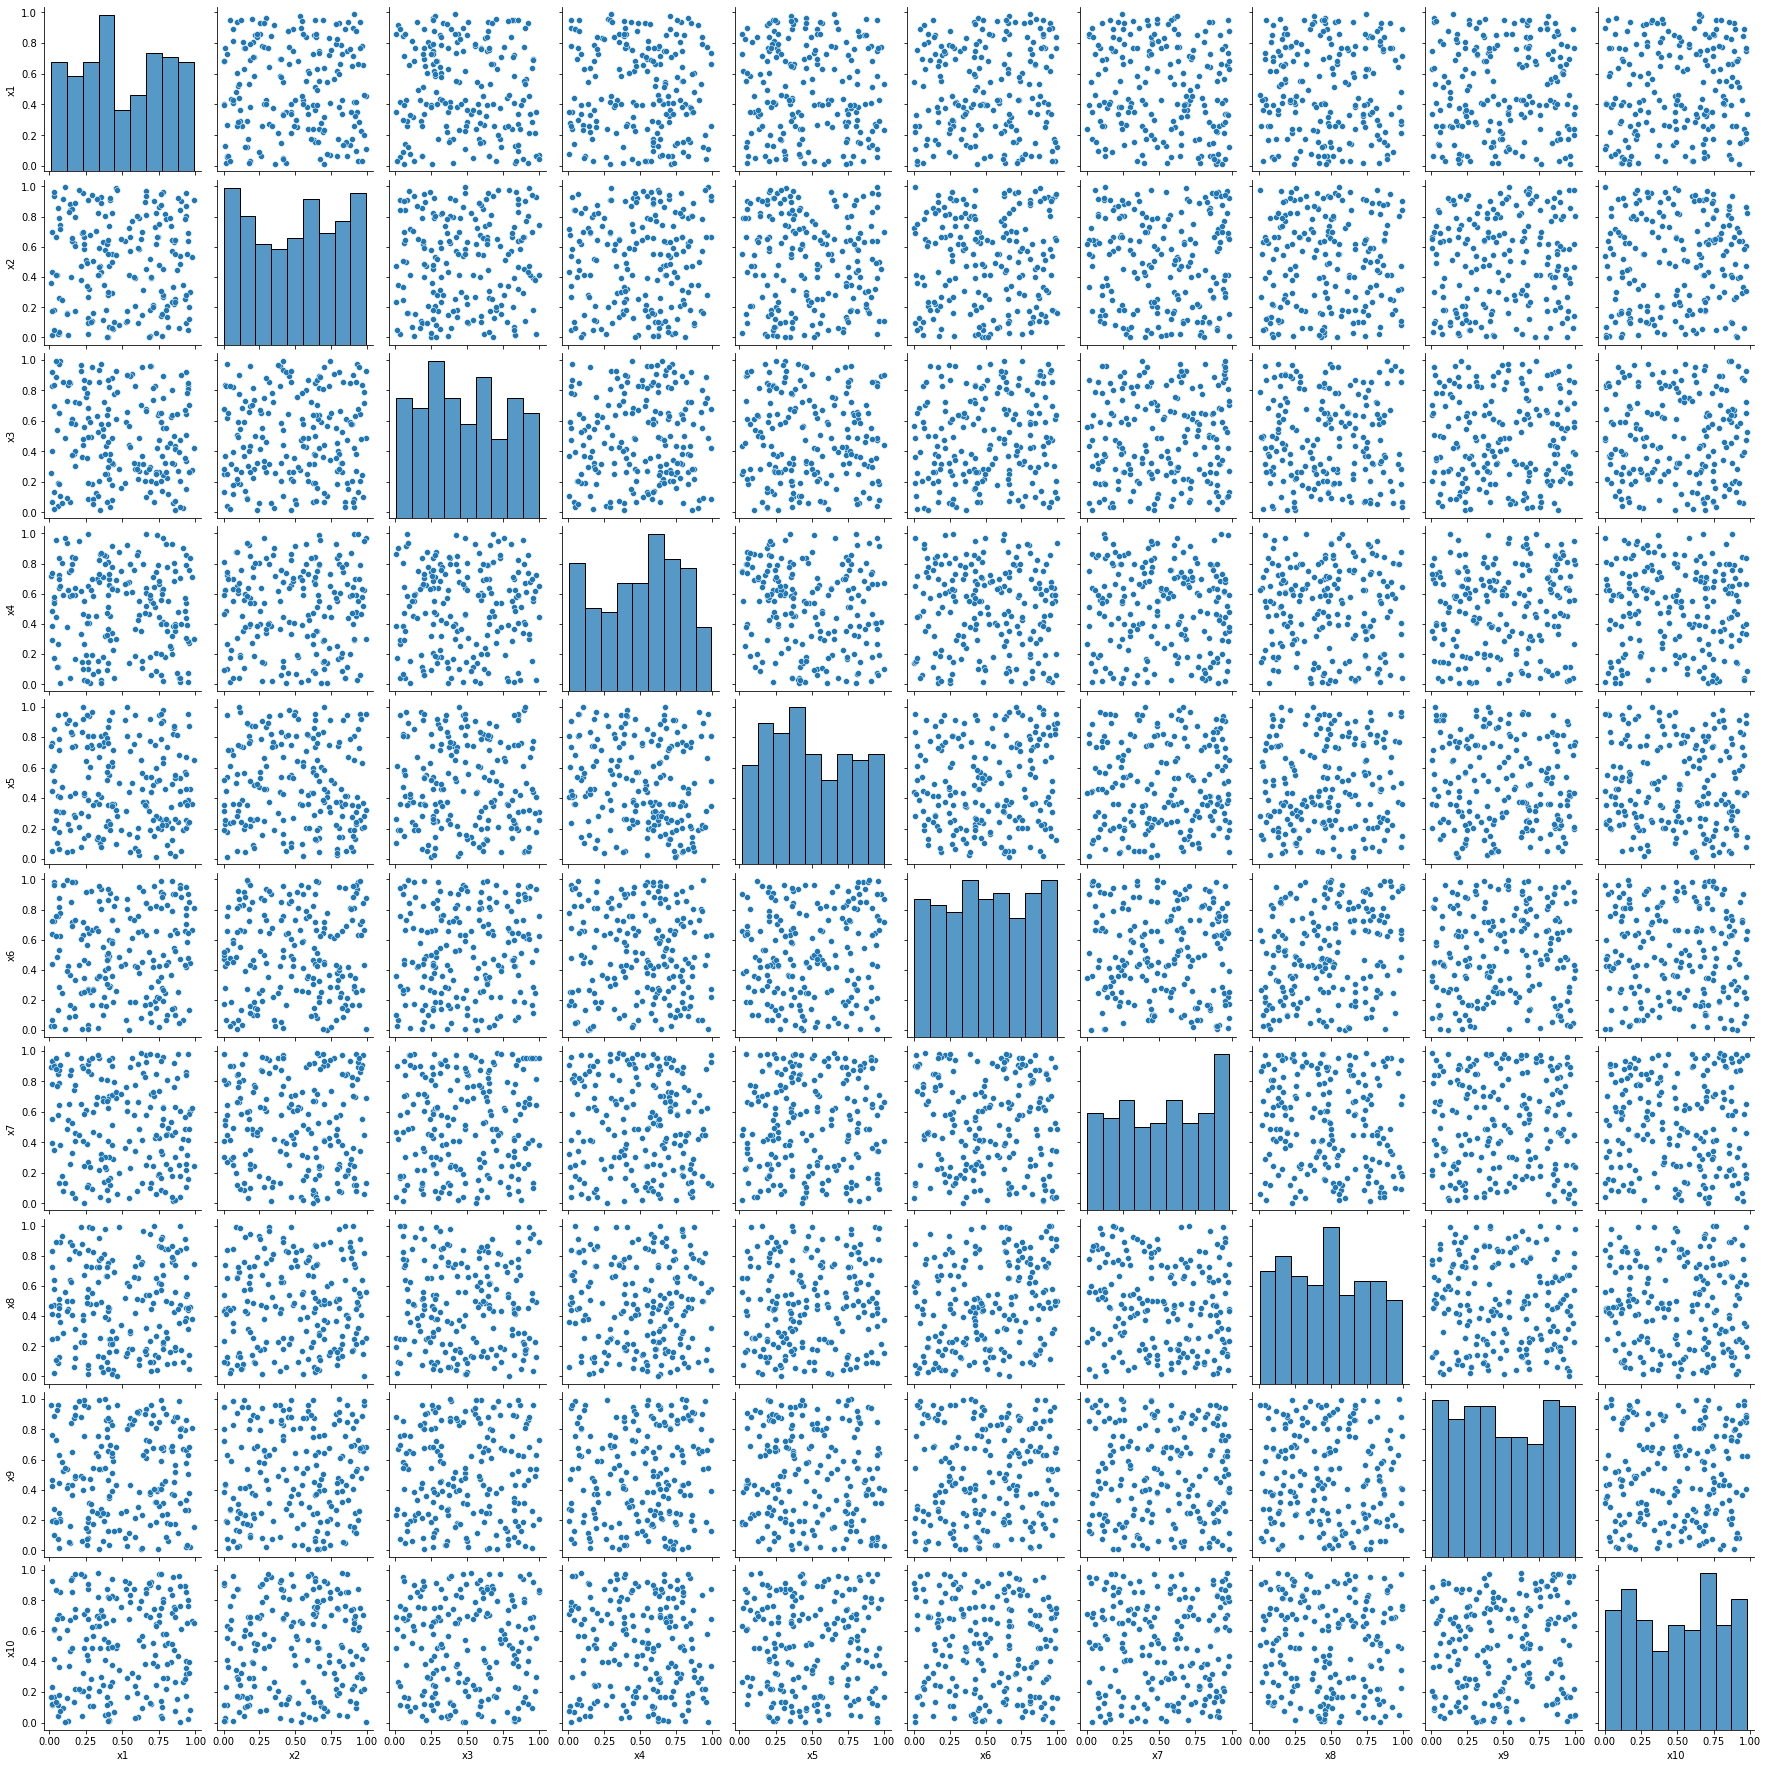

In [ ]:
g = sns.pairplot(train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']])

Pairplot for next 10 features

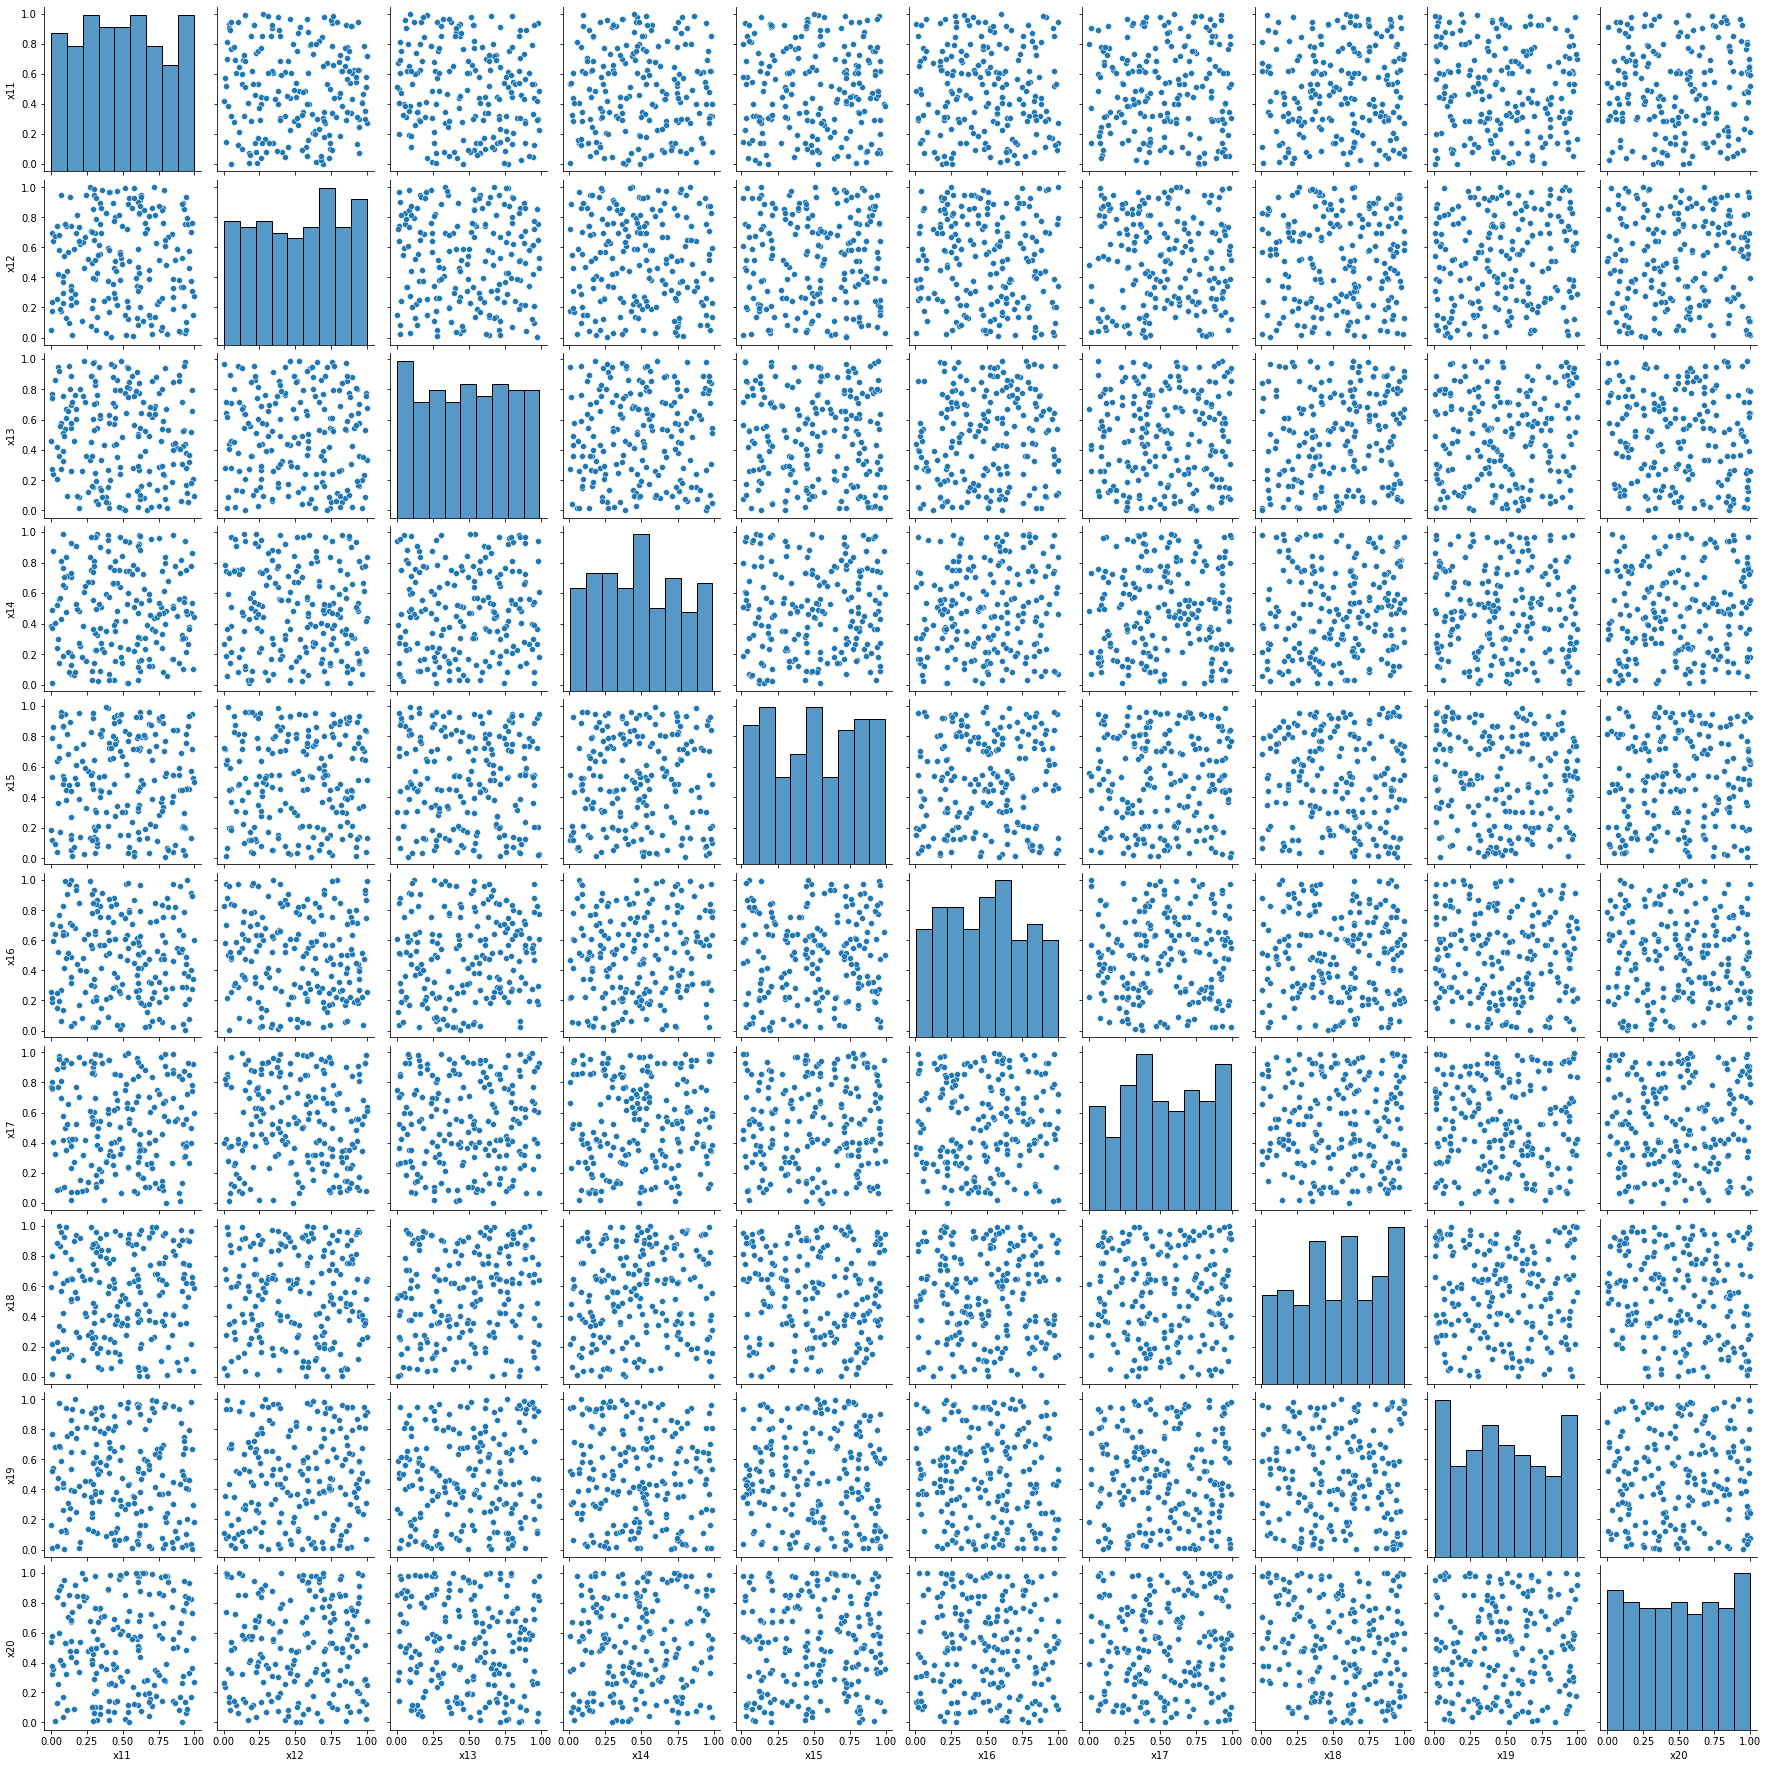

In [ ]:
g = sns.pairplot(train[['x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20']])

In [ ]:
# df1 = train
# df_cat = pd.get_dummies(df1)
# cor_mat = df_cat.corr()
# mask = np.array(cor_mat)
# mask[np.tril_indices_from(mask)]=False
# fig = plt.gcf()
# fig.set_size_inches(60,60)
# sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);

In [ ]:
X = train.drop(['y'], axis = 1)
Y = train['y']

In [ ]:
X_t = test.drop(['y'], axis = 1)
Y_t = test['y']

#Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('y',axis=1),train['y'], test_size=0.30, random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))
print("CONFUSION MATRIX\n", confusion_matrix(y_test, predictions))
print("\n")
print("ACCURACY\n", accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72        30
           1       0.73      0.63      0.68        30

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60

CONFUSION MATRIX
 [[23  7]
 [11 19]]


ACCURACY
 0.7


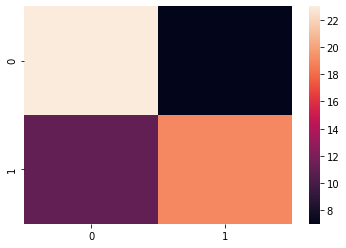

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)))
plt.show()

In [ ]:
predictions_test = logmodel.predict(test.drop('y',axis=1))
print(classification_report(test['y'],predictions_test))

#----
print("CONFUSION MATRIX\n", confusion_matrix(test['y'],predictions_test))
print("\n")
print("ACCURACY\n", accuracy_score(test['y'],predictions_test))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       491
           1       0.83      0.79      0.81       509

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000

CONFUSION MATRIX
 [[409  82]
 [109 400]]


ACCURACY
 0.809


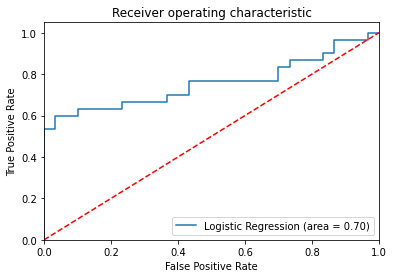

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [ ]:
def model1(train, n):
  features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20']
  # Separating out the features
  x = train.loc[:, features].values
  # Separating out the target
  y = train.loc[:,['y']].values
  # Standardizing the features
  x = StandardScaler().fit_transform(x)
  pca = PCA(n_components= n)
  principalComponents = pca.fit_transform(x)
  principalDf = pd.DataFrame(data = principalComponents)
  X_train, X_test, y_train, y_test = train_test_split(principalDf,train['y'], test_size=0.30, random_state=101)
  logmodel = LogisticRegression()
  logmodel.fit(X_train,y_train)

  predictions = logmodel.predict(X_test)
  acc_val = accuracy_score(y_test, predictions)

  predictions_test = logmodel.predict(test.drop('y',axis=1))
  print("ACCURACY\n", accuracy_score(y_test, predictions_test))

  predictions_test = logmodel.predict(test.drop('y',axis=1))
  acc_test = accuracy_score(test['y'],predictions_test) 
  return acc_val

In [ ]:
def test1(n):
  features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20']
  # Separating out the features
  x = train.loc[:, features].values
  # Separating out the target
  y = train.loc[:,['y']].values
  x_t = test.loc[:, features].values
  y_t = test.loc[:,['y']].values

  x = StandardScaler().fit_transform(x)
  x_tt = StandardScaler().fit_transform(x_t)
  pca = PCA(n_components= n)

  principalComponents = pca.fit_transform(x)
  principalComponents_t = pca.fit_transform(x_tt)

  principalDf = pd.DataFrame(data = principalComponents)
  principalDf_t = pd.DataFrame(data = principalComponents_t)

  X_train, X_test, y_train, y_test = train_test_split(principalDf,train['y'], test_size=0.25, random_state=101)
  logmodel = LogisticRegression()
  logmodel.fit(X_train,y_train)

  # predictions = logmodel.predict(X_test)
  # acc_val = accuracy_score(y_test, predictions)

  predictions_test = logmodel.predict(principalDf_t)
  acc_test = accuracy_score(test['y'],predictions_test) 

  return acc_test

In [ ]:
test1(11)

0.451

In [ ]:
for i in range(2,21):
  accuracy_for_no_of_components_i = test1(i)
  print(i, accuracy_for_no_of_components_i)

2 0.542
3 0.442
4 0.475
5 0.448
6 0.533
7 0.467
8 0.543
9 0.471
10 0.457
11 0.451
12 0.469
13 0.467
14 0.441
15 0.438
16 0.448
17 0.479
18 0.502
19 0.494
20 0.494


Text(0, 0.5, 'Second Principal Component')

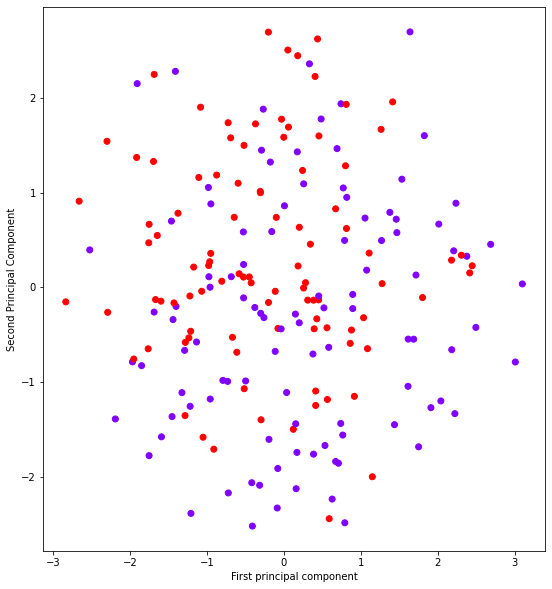

In [ ]:
features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20']
# Separating out the features
x = train.loc[:, features].values
# Separating out the target
y = train.loc[:,['y']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components= 20)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
finalDf = pd.concat([principalDf, train[['y']]], axis = 1)

plt.figure(figsize=(9,10))
plt.scatter(finalDf[1],finalDf[2],c=finalDf['y'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

#Decision Tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('y',axis=1),train['y'], test_size=0.25, random_state=101)

decision = tree.DecisionTreeClassifier()
decision = decision.fit(X_train, y_train)
# tree.plot_tree(decision)
y_pred = decision.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# y_pred = clf.predict(test.drop('y',axis=1))
# print("Accuracy:",metrics.accuracy_score(test['y'], y_pred))

Accuracy: 0.54


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=20) # now put limit on max_depth

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# dot_data = tree.export_graphviz(clf, out_file=None, feature_names=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20'],  class_names=['0', '1'],  filled=True, rounded=True,  special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph 

Accuracy: 0.54


In [ ]:
predictions_test = clf.predict(test.drop('y',axis=1))
print(classification_report(test['y'], predictions_test))

#----
print("CONFUSION MATRIX\n", confusion_matrix(test['y'],predictions_test))
print("\n")
print("ACCURACY\n", accuracy_score(test['y'],predictions_test))

              precision    recall  f1-score   support

           0       0.65      0.60      0.62       491
           1       0.64      0.68      0.66       509

    accuracy                           0.64      1000
   macro avg       0.64      0.64      0.64      1000
weighted avg       0.64      0.64      0.64      1000

CONFUSION MATRIX
 [[296 195]
 [161 348]]


ACCURACY
 0.644


In [ ]:
def model2(train, n):
  features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20']
  # Separating out the features
  x = train.loc[:, features].values
  # Separating out the target
  y = train.loc[:,['y']].values
  # Standardizing the features
  x = StandardScaler().fit_transform(x)
  pca = PCA(n_components= n)
  principalComponents = pca.fit_transform(x)
  principalDf = pd.DataFrame(data = principalComponents)
  X_train, X_test, y_train, y_test = train_test_split(principalDf,train['y'], test_size=0.25, random_state=101)

  clf = DecisionTreeClassifier(criterion="gini", max_depth=50) # now put limit on max_depth
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  acc_val = metrics.accuracy_score(y_test, y_pred)

  # predictions_test = logmodel.predict(test.drop('y',axis=1))
  # acc_test = accuracy_score(test['y'],predictions_test) 
  return acc_val

In [ ]:
for i in range(1,21):  # For i number of components in PCA
  accuracy_for_no_of_components_i = model2(train, i)
  print('Components are ',i,": ",accuracy_for_no_of_components_i)

Components are  1 :  0.34
Components are  2 :  0.48
Components are  3 :  0.54
Components are  4 :  0.62
Components are  5 :  0.5
Components are  6 :  0.54
Components are  7 :  0.5
Components are  8 :  0.48
Components are  9 :  0.54
Components are  10 :  0.46
Components are  11 :  0.52
Components are  12 :  0.48
Components are  13 :  0.44
Components are  14 :  0.48
Components are  15 :  0.4
Components are  16 :  0.54
Components are  17 :  0.62
Components are  18 :  0.62
Components are  19 :  0.58
Components are  20 :  0.54


#KNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('y',axis=1),train['y'], test_size=0.25, random_state=101)
for i in range(1, 9):
    ## Instantiate the model with 5 neighbors. 
    knn = KNeighborsClassifier(n_neighbors=i)
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    ## See how the model performs on the test data.
    print("For no. of nearest neighbour taken = ", i ,", score = ", knn.score(X_test, y_test))

For no. of nearest neighbour taken =  1 , score =  0.62
For no. of nearest neighbour taken =  2 , score =  0.62
For no. of nearest neighbour taken =  3 , score =  0.56
For no. of nearest neighbour taken =  4 , score =  0.66
For no. of nearest neighbour taken =  5 , score =  0.5
For no. of nearest neighbour taken =  6 , score =  0.62
For no. of nearest neighbour taken =  7 , score =  0.58
For no. of nearest neighbour taken =  8 , score =  0.6


K nearest neighbour with k = 4 neighbours gave an accuracy of 66%

In [ ]:
def model3(train, n):
  features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20']
  # Separating out the features
  x = train.loc[:, features].values
  # Separating out the target
  y = train.loc[:,['y']].values
  # Standardizing the features
  x = StandardScaler().fit_transform(x)
  pca = PCA(n_components= n)
  principalComponents = pca.fit_transform(x)
  principalDf = pd.DataFrame(data = principalComponents)
  X_train, X_test, y_train, y_test = train_test_split(principalDf,train['y'], test_size=0.30, random_state=101)
  knn = KNeighborsClassifier(n_neighbors=4)
  knn.fit(X_train, y_train)

  acc_val = knn.score(X_test, y_test)

  # predictions_test = logmodel.predict(test.drop('y',axis=1))
  # acc_test = accuracy_score(test['y'],predictions_test) 
  return acc_val

In [ ]:
for i in range(1,21):
  accuracy_for_no_of_components_i = model3(train, i)
  print('Components are ',i,": ",accuracy_for_no_of_components_i)

Components are  1 :  0.48333333333333334
Components are  2 :  0.5166666666666667
Components are  3 :  0.55
Components are  4 :  0.5166666666666667
Components are  5 :  0.5333333333333333
Components are  6 :  0.5833333333333334
Components are  7 :  0.6
Components are  8 :  0.5666666666666667
Components are  9 :  0.6166666666666667
Components are  10 :  0.6166666666666667
Components are  11 :  0.55
Components are  12 :  0.5333333333333333
Components are  13 :  0.48333333333333334
Components are  14 :  0.5166666666666667
Components are  15 :  0.5166666666666667
Components are  16 :  0.5333333333333333
Components are  17 :  0.55
Components are  18 :  0.5666666666666667
Components are  19 :  0.6333333333333333
Components are  20 :  0.6166666666666667


In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

predictions_test = knn.predict(test.drop('y',axis=1))
cm = confusion_matrix(test['y'], predictions_test)
print(classification_report(test['y'], predictions_test))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70       491
           1       0.72      0.57      0.64       509

    accuracy                           0.67      1000
   macro avg       0.68      0.67      0.67      1000
weighted avg       0.68      0.67      0.67      1000



/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'kNN Decision Region Boundary')

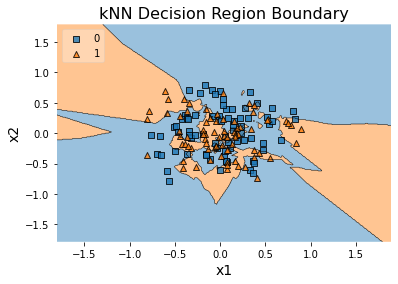

In [ ]:
# from mlxtend.plotting import plot_decision_regions
# value = 1.5
# width = 0.75
# plot_decision_regions(X_train.to_numpy(dtype ='float32'), y_train.to_numpy(), clf=knn, filler_feature_values={1: value, 3:value},filler_feature_ranges={1: width, 3: width}, legend=2)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Knn with K='+ str(k))
# plt.show()
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

clf = KNeighborsClassifier(n_neighbors=4)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train.to_numpy(), clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('kNN Decision Region Boundary', size=16)

From the above experiments we can see that only Logistic regression has worked the best, giving 80.9% accuracy on the test data set. Decision trees and kNN gave accuracies around 65%.<br>

# Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('y',axis=1),train['y'], test_size=0.25, random_state=101)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix: ')
print(cm)
# print('Score on validation set: ', classifier.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Confusion matrix: 
[[16 12]
 [ 7 15]]
              precision    recall  f1-score   support

           0       0.70      0.57      0.63        28
           1       0.56      0.68      0.61        22

    accuracy                           0.62        50
   macro avg       0.63      0.63      0.62        50
weighted avg       0.63      0.62      0.62        50



In [ ]:
predictions_test = classifier.predict(test.drop('y',axis=1))
cm = confusion_matrix(test['y'], predictions_test)
print(classification_report(test['y'], predictions_test))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       491
           1       0.79      0.73      0.76       509

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'XG Decision Region Boundary')

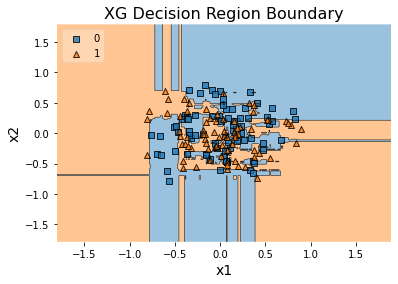

In [ ]:
clf = classifier
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train.to_numpy(), clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('XG Decision Region Boundary', size=16)

# Artificial Neural Networks

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 20))

# Adding the second hidden layer
classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 16, epochs = 50)

Epoch 1/50
10/10 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4200
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4067
Epoch 3/50
10/10 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 5/50
10/10 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 10/50
10/10 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5133
Epoch 11/50
10/10 [

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.65)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        28
           1       0.60      0.55      0.57        22

    accuracy                           0.64        50
   macro avg       0.63      0.63      0.63        50
weighted avg       0.64      0.64      0.64        50



In [ ]:
predictions_test = classifier.predict(test.drop('y',axis=1))
predictions_test = predictions_test>0.65
cm = confusion_matrix(test['y'], predictions_test)

In [ ]:
print(classification_report(test['y'], predictions_test))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       491
           1       0.79      0.71      0.75       509

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



# XGBoost classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('y',axis=1),train['y'], test_size=0.25, random_state=101)

# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)

In [ ]:
print(accuracies.mean(), accuracies.std())
print(classification_report(y_test, y_pred))

predictions_test = classifier.predict(test.drop('y',axis=1))
print(classification_report(test['y'], predictions_test))

0.7666666666666667 0.04216370213557842
              precision    recall  f1-score   support

           0       0.73      0.68      0.70        28
           1       0.62      0.68      0.65        22

    accuracy                           0.68        50
   macro avg       0.68      0.68      0.68        50
weighted avg       0.68      0.68      0.68        50

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       491
           1       0.78      0.73      0.76       509

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



In [ ]:
# Applying grid search to find best model and best parameters
from sklearn.model_selection import GridSearchCV
parameters = param_test1 = {'max_depth':range(3,10,2), 'min_child_weight':range(1,6,2), 'learning_rate': [0.01, 0.1, 1] }

classifier = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
gsearch1 = GridSearchCV(estimator = classifier, param_grid = param_test1, scoring='roc_auc', n_jobs=4, iid=False, cv=5)
gsearch1.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             

In [ ]:
best_accuracy = gsearch1.best_score_
best_parameters = gsearch1.best_params_

print(best_accuracy)
print(best_parameters)

0.8977777777777778
{'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3}


In [ ]:
classifier = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5, min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)

print(accuracies.mean(), accuracies.std())
print(classification_report(y_test, y_pred))

predictions_test = classifier.predict(test.drop('y',axis=1))
print(classification_report(test['y'], predictions_test))

0.8133333333333335 0.03399346342395189
              precision    recall  f1-score   support

           0       0.73      0.68      0.70        28
           1       0.62      0.68      0.65        22

    accuracy                           0.68        50
   macro avg       0.68      0.68      0.68        50
weighted avg       0.68      0.68      0.68        50

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       491
           1       0.79      0.75      0.77       509

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000



/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'XG Boost Decision Region Boundary')

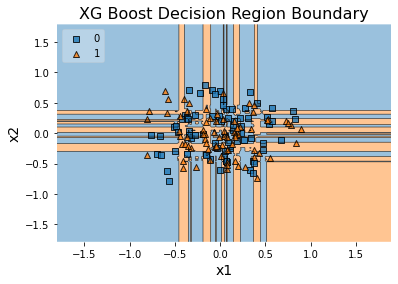

In [ ]:
clf = classifier
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train.to_numpy(), clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('XG Boost Decision Region Boundary', size=16)

# SVM classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('y',axis=1),train['y'], test_size=0.25, random_state=101)

# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.64      0.67        28
           1       0.58      0.64      0.61        22

    accuracy                           0.64        50
   macro avg       0.64      0.64      0.64        50
weighted avg       0.64      0.64      0.64        50



In [ ]:
# Applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X_train, y=y_train, cv=10)

print(accuracies.mean(), accuracies.std())

# Applying grid search to find best model and best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[1, 10, 100, 1000], 'kernel':['linear']},
              {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.78]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv=10,
                           n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy)
print(best_parameters)

0.8266666666666668 0.08000000000000002
0.8733333333333334
{'C': 1, 'kernel': 'linear'}


In [ ]:
parameters = [{'C':[0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6], 'kernel':['linear']}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv=10,
                           n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy)
print(best_parameters)

0.8800000000000001
{'C': 1.1, 'kernel': 'linear'}


In [ ]:
classifier = SVC(C = 1.1, kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70        28
           1       0.62      0.59      0.60        22

    accuracy                           0.66        50
   macro avg       0.65      0.65      0.65        50
weighted avg       0.66      0.66      0.66        50



In [ ]:
predictions_test = classifier.predict(test.drop('y',axis=1))
print(classification_report(test['y'], predictions_test))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       491
           1       0.80      0.84      0.82       509

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'SVM Decision Region Boundary')

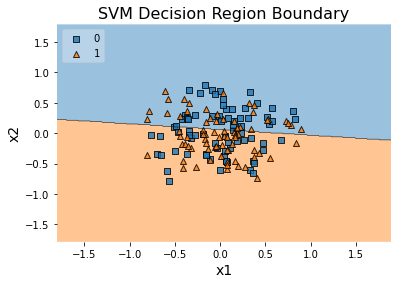

In [ ]:
clf = classifier
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train.to_numpy(), clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)